# K-평균(K-Means)
---
**K-평균**(K-Means): 군집 알고리즘으로 프로토타입 기반 군집
- 군집: 비슷한 객체로 이루어진 그룹을 찾는 기법
- 프로토타입 기반 군집: 각 클러스터가 하나의 프로토타입으로 표현되다는 뜻
  - 연속적인 특성: 비슷한 데이터 포인트의 <U>센트로이드(평균)</U>
  - 범주형 특성: <U>메도이드(가장 자주 등장하는 포인트)</U>

**K-평균 알고리즘의 단계**
1. 샘플 포인트에서 랜덤하게 $k$개의 센트로이드를 초기 클러스터 중심으로 선택
2. 각 샘플을 가장 가까운 센트로이드 $μ^{(j)}, j∈\{1, ...,k\}$에 할당
3. 할당된 샘플들의 중심으로 센트로이드를 이동
4. 클러스터 할당이 변하지 않거나, 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복

**단점**
- 클러스터 개수 $k$를 사전에 지정해야 함

# 비지도 학습(군집 분석) 실습
---
**데이터셋**: 가상 데이터(`make_blobs` 함수)

**K-평균**(K-Means)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비
- `make_blobs`를 사용하여 가상 데이터를 만들어서 사용

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  centers=3, 
                  n_features=2, 
                  cluster_std=0.5, 
                  random_state=0)

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

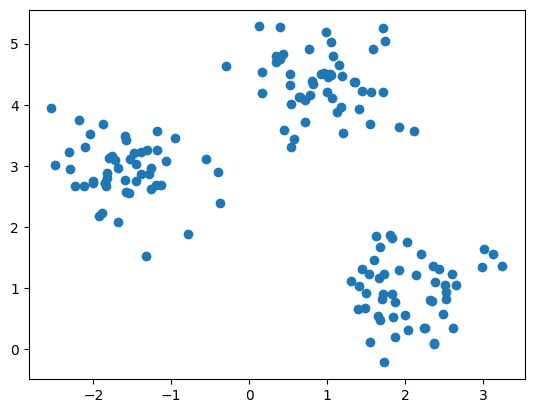

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 학습

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42, n_init='auto')
km.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

### 예측

In [ ]:
y_pred = km.predict(X)
y_pred

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
df = pd.DataFrame(X, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [ ]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,1
1,0.532377,3.313389,2
2,0.802314,4.381962,2
3,0.528537,4.497239,2
4,2.618585,0.357698,1


In [ ]:
centroid = km.cluster_centers_
centroid

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

- **K-Means 결과 시각화**

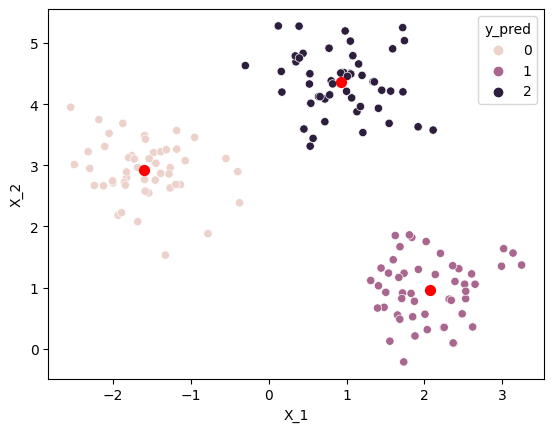

In [ ]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
            s=50, marker='o', c='red')
plt.show()

### 엘보우 방법(Elbow Method)
군집 품질을 평가하는 기법으로 최적의 군집 수($k$)를 결정하는 방법

In [ ]:
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    inertia.append(km.inertia_)

print(inertia)

[283.4610178020931, 72.47601670996696, 64.80277592491126, 55.167376900366484, 46.19645015738749, 41.27223581499828, 36.134319822741986, 32.51084002161956, 27.942640688029975]


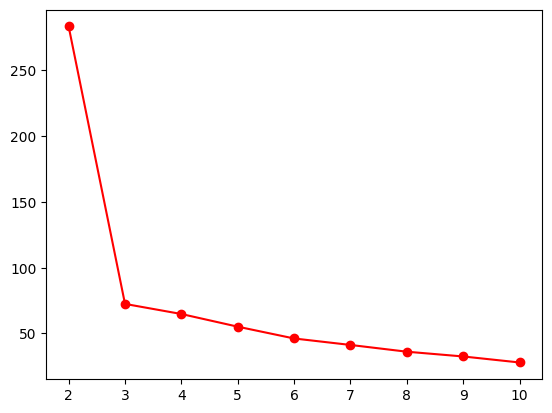

In [ ]:
plt.plot(range(2, 11), inertia, marker='o', color='red')
plt.show()

# 비지도 학습(군집 분석) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**K-평균**(K-Means)

### 데이터 준비

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 데이터
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
X = data.values

### 엘보우 방법(Elbow Method)

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto') 
    km.fit(X)
    inertia.append(km.inertia_)

print(inertia)

[58.204092789066735, 37.08627024722932, 28.069196688369104, 21.220005358665205, 18.488607260386672, 15.515614310657423, 12.963071632030069, 11.914247934856098, 10.499191219512621]


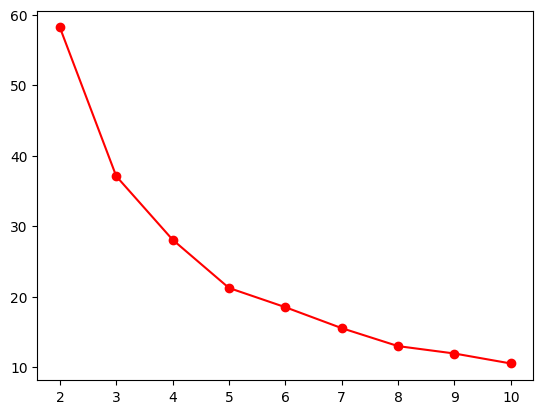

In [ ]:
plt.plot(range(2, 11), inertia, marker='o', color='red')
plt.show()

### 학습

In [ ]:
km = KMeans(n_clusters=3, random_state=42, n_init='auto')
km.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

### 예측

In [ ]:
y_pred = km.predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
data['y_pred'] = y_pred

In [ ]:
centroid = km.cluster_centers_
centroid

array([[6.82391304, 3.07826087],
       [5.8       , 2.7       ],
       [5.00392157, 3.40980392]])

- **K-Means 결과 시각화**

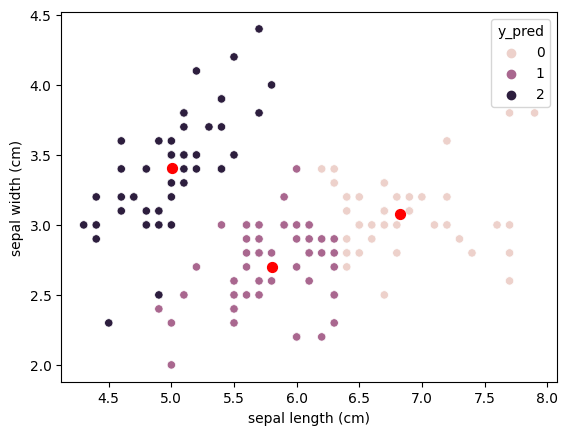

In [ ]:
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
            s=50, marker='o', c='red')
plt.show()